In [ ]:
from stable_baselines3 import HerReplayBuffer, PPO, SAC
from stable_baselines3.her.goal_selection_strategy import GoalSelectionStrategy
from stable_baselines3.common.evaluation import evaluate_policy
import gymnasium as gym
import numpy as np
import time
import matplotlib.pyplot as plt
from gymnasium.envs.registration import register

 

Use_torch = int(input("want to use torch (0-no , 1-yes): "))
algorithm_name = input("algorithm name: ")
EpiLen = input("Episode Length: ")

 

if Use_torch == 0:
    register(
        # unique identifier for the env `name-version`
        id="RobotEnv-v0",
        # path to the class for creating the env
        # Note: entry_point also accept a class as input (and not only a string)
        entry_point="Robot_env:RobotEnv",
        kwargs={'epi_len': int(EpiLen)},
    )
else:
    register(
        # unique identifier for the env `name-version`
        id="RobotEnv-v0",
        # path to the class for creating the env
        # Note: entry_point also accept a class as input (and not only a string)
        entry_point="Robot_env_torch:RobotEnv",
        kwargs={'epi_len': int(EpiLen)},
    )
env = gym.make("RobotEnv-v0", env_kwargs={"epi_len": EpiLen})
# model_folder_name = "./model/"+"model_"+algorithm_name+"_"+EpiLen+"EpiLen"
model_path = "./models/"+algorithm_name+"/model_"+algorithm_name+"_"+EpiLen+"EpiLen"
if algorithm_name=="PPO":
    model = PPO.load(model_path, env=env)
elif algorithm_name=="SAC":
    model = SAC.load(model_path, env=env)

 

x_min,x_max,y_min,y_max = [],[],[],[]
x_state,y_state,theta_state,rew = [],[],[],[]
for _ in range(1):
    obs, info = env.reset()
    for i in range(int(EpiLen)):
        action, _ = model.predict(obs, deterministic=True)
        action = np.clip(action,env.action_space.low, env.action_space.high)
        obs, reward, terminated, truncated, info = env.step(action)
        x_state.append(obs[0])
        y_state.append(obs[1])
        theta_state.append(obs[2])
        rew.append(reward)
        x_min.append(info['x_min'])
        x_max.append(info['x_max'])
        y_min.append(info['y_min'])
        y_max.append(info['y_max'])

        if terminated or truncated:
            obs, info = env.reset()
    env.render()
env.close()

In [ ]:
#plots of state x,y

time = np.linspace(0,40,int(EpiLen))
plt.plot(time,x_min,time,x_max,time,x_state)
plt.xlabel("Time",fontsize=15)
plt.ylabel('x - state',fontsize=15)
plt.legend(['x_lb','x_ub','x_act'])
plt.grid()
plt.figure()
plt.plot(time,y_min,time,y_max,time,y_state)
plt.legend(['y_lb','y_ub','y_act'])
plt.grid()
plt.xlabel("Time",fontsize=15)
plt.ylabel('y - state',fontsize=15)

In [ ]:
import math
time = np.linspace(-10,10,int(EpiLen))
time_int = 0.01
xd=[[-1.5+5.8*math.cos(0.24*time_int*t+1.5), 3*math.sin(0.24*t*time_int+1.5)] for t in range(int(EpiLen))]
state_d = np.array(xd)
time = np.linspace(-10,10,int(EpiLen))
x_lb_hard = [-6.58 for i in range(int(EpiLen))]
x_ub_hard = [6.58 for i in range(int(EpiLen))]
lb_hard_y = [-4.63 for i in range(int(EpiLen))]
ub_hard_y = [4.63 for i in range(int(EpiLen))]
plt.plot(state_d[:,0],state_d[:,1],x_lb_hard,time,x_ub_hard,time,time,lb_hard_y,time,ub_hard_y,x_state,y_state)

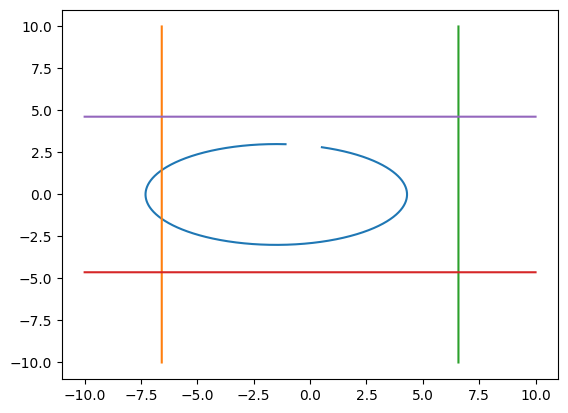

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt
EpiLen = 2500
time = np.linspace(-10,10,EpiLen)
time_int = 0.01
xd=[[-1.5+5.8*math.cos(0.24*time_int*t+1.5), 3*math.sin(0.24*t*time_int+1.5)] for t in range(EpiLen)]
state_d = np.array(xd)
time = np.linspace(-10,10,EpiLen)
x_lb_hard = [-6.58 for i in range(EpiLen)]
x_ub_hard = [6.58 for i in range(EpiLen)]
lb_hard_y = [-4.63 for i in range(EpiLen)]
ub_hard_y = [4.63 for i in range(EpiLen)]
plt.plot(state_d[:,0],state_d[:,1],x_lb_hard,time,x_ub_hard,time,time,lb_hard_y,time,ub_hard_y)

Episode Length:  100


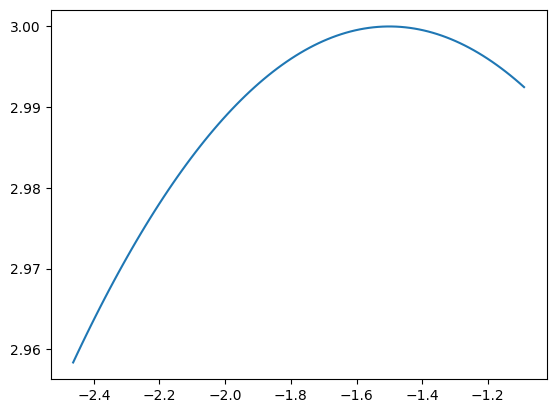

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

epi_len = int(input("Episode Length: "))
h = 0.01
xd=[[-1.5+5.8*math.cos(0.24*h*t+1.5), 3*math.sin(0.24*t*h+1.5)] for t in range(epi_len)]
state_d = np.array(xd)


plt.plot(state_d[:,0],state_d[:,1])

x = -1.089
y = 3
theta = 0
time_int = h
xd=[[-1.5+5.8*math.cos(0.24*time_int*t+1.5), 3*math.sin(0.24*t*time_int+1.5)] for t in range(epi_len)]
state_d = np.array(xd)
l = np.array([0.7,0.7])
rho_f = np.array([0.2,0.2])
rho_0 = np.array(abs(np.array([x,y])- state_d[0,:]) + 0.07)
gamma = np.array([(rho_0 - rho_f)*np.exp(-l*time_int*t) + rho_f for t in range(epi_len)])
gamma_x = np.array([(rho_0[0] - rho_f[0])*np.exp(-l[0]*time_int*t) + rho_f[0] for t in range(epi_len)])
gamma_y = np.array([(rho_0[1] - rho_f[1])*np.exp(-l[1]*time_int*t) + rho_f[1] for t in range(epi_len)])
lb_soft_x = state_d[:,0] - gamma_x
lb_soft_y = state_d[:,1] - gamma_y
ub_soft_x = state_d[:,0] + gamma_x
ub_soft_y = state_d[:,1] + gamma_y
lb_soft = state_d - gamma
ub_soft = state_d + gamma
phi_ini_L = [0,0]
phi_ini_U = [0,0]



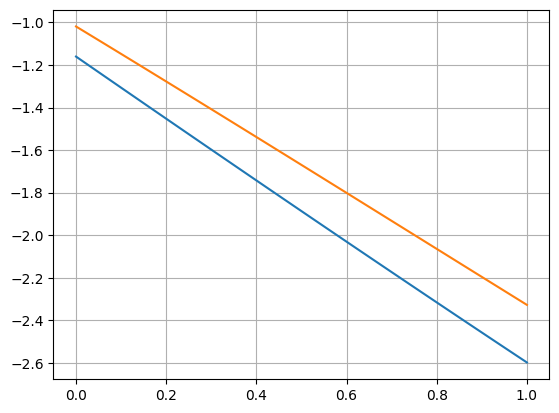

In [12]:
time = np.linspace(0,h*epi_len,epi_len)
plt.plot(time,lb_soft[:,0],time,ub_soft[:,0])
plt.grid()


In [13]:
def bound(phi,t,lb, ub, mu, kc):
    eta = ub-lb
    dphi_dt = 0.5*(1-np.sign(eta-mu))*(1/(eta+phi))-kc*phi
    return dphi_dt
  #    --------ADD FUNNEL HERE---------
def funnel(lb_soft, ub_soft, phi_ini_L, phi_ini_U):
    mu = np.array([3,3])   #For different states
    kc = np.array([3.0, 3.0])   #For different states
    # Hard Constraints - Boundary
    lb_hard = np.array([-6.58, -4.63])
    ub_hard = np.array([6.58, 4.63])

    # Soft Constraints - Trajectory tracking-as input
    t1 = [0,h]
    t, phi_L = odeint(bound, phi_ini_L, t1, args=(lb_soft, ub_hard, mu, kc))
    phi_sol_L = phi_L #np.abs(phi_L)
    t, phi_U = odeint(bound, phi_ini_U, t1, args=(lb_hard, ub_soft, mu, kc))
    phi_sol_U = phi_U #np.abs(phi_U)
    v = 10
    Lb = np.log(np.exp(v * (lb_soft - phi_sol_L)) + np.exp(v * lb_hard)) / v
    Ub = -np.log(np.exp(-v * (ub_soft + phi_sol_U)) + np.exp(-v * ub_hard)) / v
    return phi_sol_L, phi_sol_U, Lb, Ub

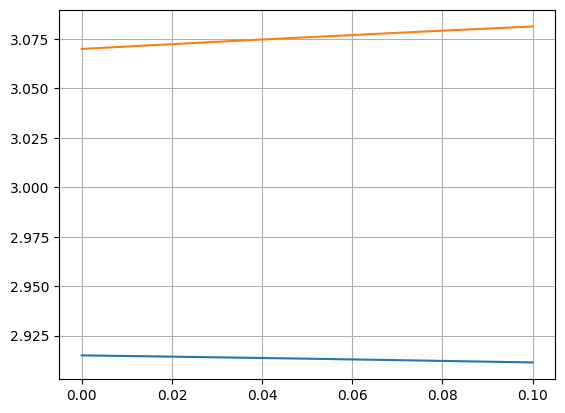

In [6]:
plt.plot(time,lb_soft[:,1],time,ub_soft[:,1])
plt.grid()

In [7]:
low_bound,upper_bound,time = [],[],[]
for j in range(epi_len):
  phi_sol_L,phi_sol_U,Lb,Ub = funnel(lb_soft[j,:],ub_soft[j,:],np.array(phi_ini_L),np.array(phi_ini_U))
  phi_ini_L = phi_sol_L
  phi_ini_U = phi_sol_U
  low_bound.append(Lb)
  upper_bound.append(Ub)
  time.append(j*h)

low_x = [inner_list[0] for inner_list in low_bound]
low_y = [inner_list[1] for inner_list in low_bound]
high_x = [inner_list[0] for inner_list in upper_bound]
high_y = [inner_list[1] for inner_list in upper_bound]

lb_hard = [-6.58 for i in range(epi_len)]
ub_hard = [6.58 for i in range(epi_len)]


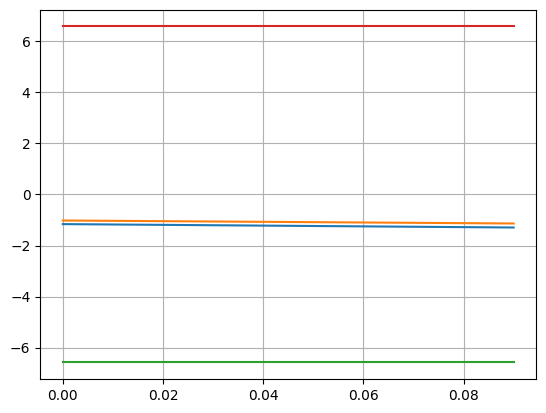

In [8]:
plt.plot(time,low_x,time,high_x,time, lb_hard,time,ub_hard)
plt.grid()

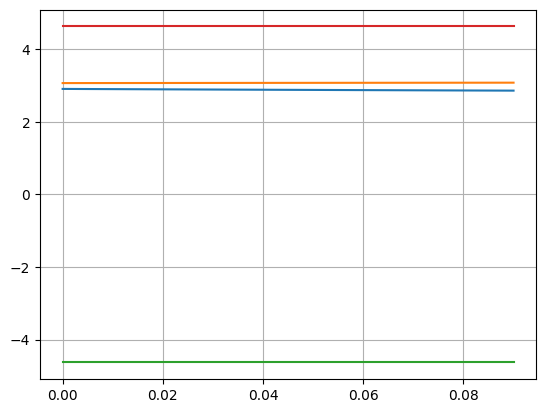

In [9]:
lb_hard_y = [-4.63 for i in range(epi_len)]
ub_hard_y = [4.63 for i in range(epi_len)]
plt.plot(time,low_y,time,high_y,time,lb_hard_y,time,ub_hard_y)
plt.grid()

In [ ]:
t=np.linspace(-10,10,epi_len)
for _ in range(epi_len):
    x_min,y_min = low_x[_],low_y[_]
    x_max,y_max = high_x[_],high_y[_]
    Rew_max_x = abs(x_max - x_min)
    robust1 = Rew_max_x - ((t - (x_min + x_max)/2)**2)*(4*Rew_max_x/((x_max-x_min)**2))
    Rew_max_y = abs(y_max - y_min)
    robust2 = Rew_max_y - ((t - (y_min + y_max)/2)**2)*(4*Rew_max_y/((y_max-y_min)**2))
    